#                                                                                HOME LOAN SANCTION

Problem Statement:

About Company
Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban and rural areas. The customer first applies for a home loan after that company validates the customer's eligibility for a loan.

Problem
The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem identifying the customer segments eligible for loan amounts to target these customers specifically.

Loan ID: Unique Loan ID,
Gender: Male/ Female,
Married: Applicant married (Yes/No),
Dependents: Number of dependents,
Education: Applicant Education (Graduate/ Under Graduate),
Self-employed: Self-employed (Y/N),
ApplicantIncome,
CoapplicantIncome,
LoanAmount: Loan amount in thousands,
Loan_Amount_Ter: Term of the loan in months,
Credit_History: credit history meets guidelines(1:"Good",0:"Bad")
Property_Area: Urban/ Semi Urban/ Rural

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv(r"C:\Users\Shipun Meher\Downloads\loan_sanction_train.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Understanding Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [6]:
df["Gender"].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [7]:
df[df["Gender"].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [8]:
df["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

<Axes: ylabel='count'>

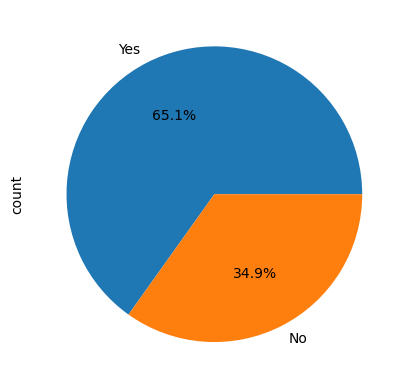

In [9]:
df["Married"].value_counts().plot(kind="pie",autopct="%0.1f%%")

In [10]:
df[df["Married"].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [11]:
df["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

<Axes: xlabel='Dependents'>

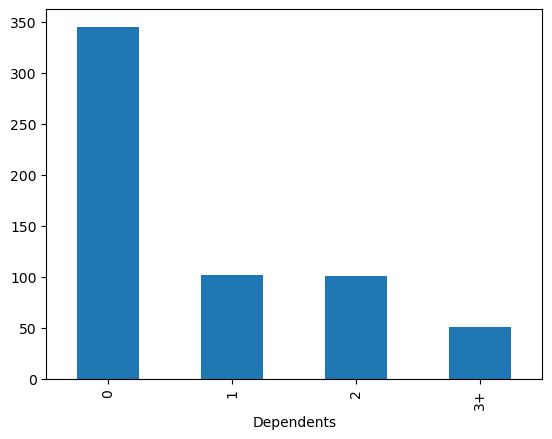

In [12]:
df["Dependents"].value_counts().plot(kind="bar")

In [13]:
df["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

<Axes: ylabel='Education'>

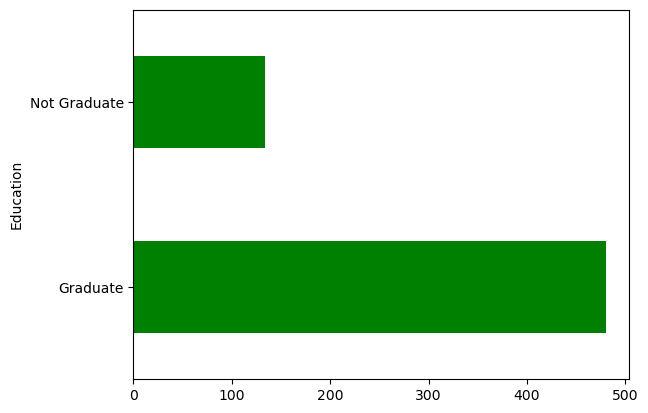

In [14]:
df["Education"].value_counts().plot(kind="barh",color="Green")

In [15]:
df["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [16]:
df["Self_Employed"].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [17]:
df["Total Income"]=df["ApplicantIncome"] + df["CoapplicantIncome"]
df["Total Income"]

0      5849.0
1      6091.0
2      3000.0
3      4941.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8312.0
612    7583.0
613    4583.0
Name: Total Income, Length: 614, dtype: float64

In [18]:
df.drop(columns=["ApplicantIncome","CoapplicantIncome"],inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Loan_ID           614 non-null    object 
 1   Gender            601 non-null    object 
 2   Married           611 non-null    object 
 3   Dependents        599 non-null    object 
 4   Education         614 non-null    object 
 5   Self_Employed     582 non-null    object 
 6   LoanAmount        592 non-null    float64
 7   Loan_Amount_Term  600 non-null    float64
 8   Credit_History    564 non-null    float64
 9   Property_Area     614 non-null    object 
 10  Loan_Status       614 non-null    object 
 11  Total Income      614 non-null    float64
dtypes: float64(4), object(8)
memory usage: 57.7+ KB


In [20]:
df["LoanAmount"].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [21]:
df["LoanAmount"].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [22]:
df["LoanAmount"].value_counts()

LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64

In [23]:
 df["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

<Axes: xlabel='Loan_Amount_Term'>

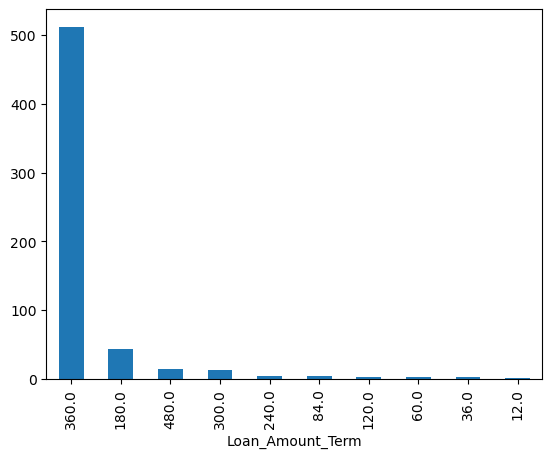

In [24]:
df["Loan_Amount_Term"].value_counts().plot(kind="bar")

In [25]:
df["Credit_History"].unique()

array([ 1.,  0., nan])

In [26]:
df["Credit_History"].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [27]:
df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

<Axes: ylabel='count'>

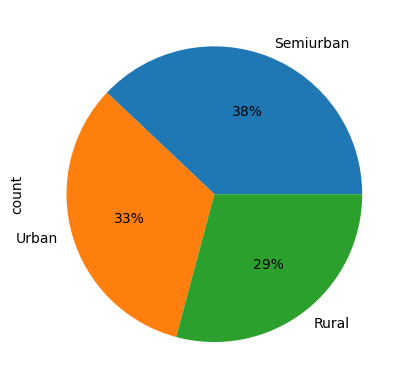

In [28]:
df["Property_Area"].value_counts().plot(kind="pie",autopct="%0.0f%%")

In [29]:
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

<Axes: xlabel='Loan_Status'>

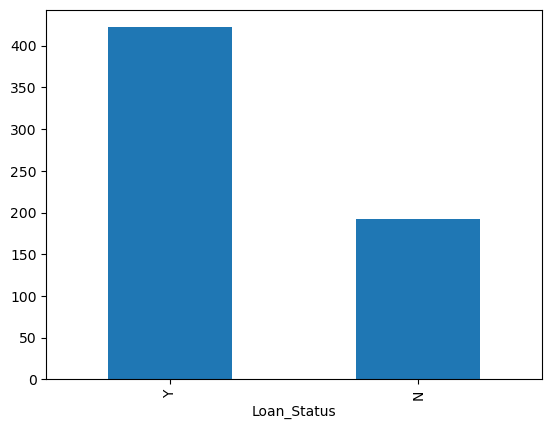

In [30]:
df["Loan_Status"].value_counts().plot(kind="bar")

In [31]:
df["Loan_ID"].nunique()

614

In [32]:
df.drop(columns=["Loan_ID"],inplace=True)

In [33]:
df["Credit_History"].replace({1:"Good",0:"Bad"},inplace=True)

In [34]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total Income
0,Male,No,0,Graduate,No,NaN,360.0,Good,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,Good,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,Good,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,Good,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,Good,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.0,360.0,Good,Rural,Y,2900.0
610,Male,Yes,3+,Graduate,No,40.0,180.0,Good,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,253.0,360.0,Good,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,187.0,360.0,Good,Urban,Y,7583.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            601 non-null    object 
 1   Married           611 non-null    object 
 2   Dependents        599 non-null    object 
 3   Education         614 non-null    object 
 4   Self_Employed     582 non-null    object 
 5   LoanAmount        592 non-null    float64
 6   Loan_Amount_Term  600 non-null    float64
 7   Credit_History    564 non-null    object 
 8   Property_Area     614 non-null    object 
 9   Loan_Status       614 non-null    object 
 10  Total Income      614 non-null    float64
dtypes: float64(3), object(8)
memory usage: 52.9+ KB


# DATA CLEANING

In [36]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)

In [37]:
df["Married"].fillna(df["Married"].mode()[0], inplace = True)

In [38]:
df.isna().sum()

Gender               0
Married              0
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Total Income         0
dtype: int64

In [39]:
df["Dependents"]=df["Dependents"].replace({"3+":3})
df["Dependents"]

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: object

In [40]:
df["Dependents"].fillna(df["Dependents"].mode()[0], inplace = True)

In [41]:
df["Dependents"]=df["Dependents"].astype("int")
df["Dependents"]

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: int32

In [42]:
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])


0       No
1       No
2      Yes
3       No
4       No
      ... 
609     No
610     No
611     No
612     No
613    Yes
Name: Self_Employed, Length: 614, dtype: object

In [43]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total Income
0,Male,No,0,Graduate,No,NaN,360.0,Good,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,Good,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,Good,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,Good,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,Good,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.0,360.0,Good,Rural,Y,2900.0
610,Male,Yes,3,Graduate,No,40.0,180.0,Good,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,253.0,360.0,Good,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,187.0,360.0,Good,Urban,Y,7583.0


In [44]:
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

In [45]:
df=df.dropna(subset=['LoanAmount','Loan_Amount_Term','Credit_History','Total Income'])
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total Income
1,Male,Yes,1,Graduate,No,128.0,360.0,Good,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,Good,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,Good,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,Good,Urban,Y,6000.0
5,Male,Yes,2,Graduate,Yes,267.0,360.0,Good,Urban,Y,9613.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.0,360.0,Good,Rural,Y,2900.0
610,Male,Yes,3,Graduate,No,40.0,180.0,Good,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,253.0,360.0,Good,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,187.0,360.0,Good,Urban,Y,7583.0


In [46]:
df.isnull().sum()/len(df)*100

Gender              0.0
Married             0.0
Dependents          0.0
Education           0.0
Self_Employed       0.0
LoanAmount          0.0
Loan_Amount_Term    0.0
Credit_History      0.0
Property_Area       0.0
Loan_Status         0.0
Total Income        0.0
dtype: float64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 529 entries, 1 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            529 non-null    object 
 1   Married           529 non-null    object 
 2   Dependents        529 non-null    int32  
 3   Education         529 non-null    object 
 4   Self_Employed     529 non-null    object 
 5   LoanAmount        529 non-null    float64
 6   Loan_Amount_Term  529 non-null    float64
 7   Credit_History    529 non-null    object 
 8   Property_Area     529 non-null    object 
 9   Loan_Status       529 non-null    object 
 10  Total Income      529 non-null    float64
dtypes: float64(3), int32(1), object(7)
memory usage: 47.5+ KB


<Axes: ylabel='LoanAmount'>

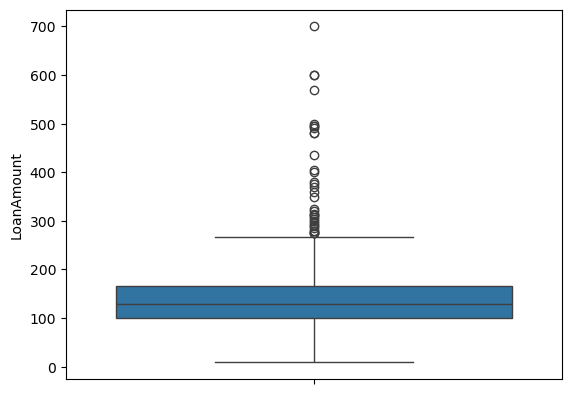

In [48]:
sns.boxplot(df["LoanAmount"])

In [49]:
continous = ["Income" , "LoanAmount" ]
discrete_categorial = ["Gender" , "Married" , "Education" , "Self_Employed" , "Credit_History" , 
                       "Property_Area" , "Loan_Status"]
discrete_count = ["Dependent" ,  "Loan_Amount_Term"]

In [50]:
df.dtypes

Gender               object
Married              object
Dependents            int32
Education            object
Self_Employed        object
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History       object
Property_Area        object
Loan_Status          object
Total Income        float64
dtype: object

# ANALYSIS

In [51]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total Income
1,Male,Yes,1,Graduate,No,128.0,360.0,Good,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,Good,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,Good,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,Good,Urban,Y,6000.0
5,Male,Yes,2,Graduate,Yes,267.0,360.0,Good,Urban,Y,9613.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.0,360.0,Good,Rural,Y,2900.0
610,Male,Yes,3,Graduate,No,40.0,180.0,Good,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,253.0,360.0,Good,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,187.0,360.0,Good,Urban,Y,7583.0


# Q.1---Distribution of Loan Amount

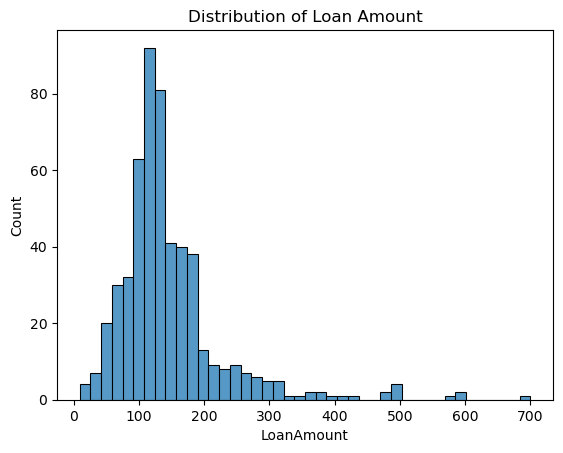

In [52]:
sns.histplot(data=df,x="LoanAmount")
plt.title("Distribution of Loan Amount")
plt.show()

# The distribution is right-skewed and more data appears between 0 and 200, with a highest point around 100.

# Q2- Is there any relation difference in loan status between married and unmarried ?

In [53]:
df.groupby("Married")["Loan_Status"].value_counts()

Married  Loan_Status
No       Y              119
         N               69
Yes      Y              247
         N               94
Name: count, dtype: int64

<Axes: xlabel='Married,Loan_Status'>

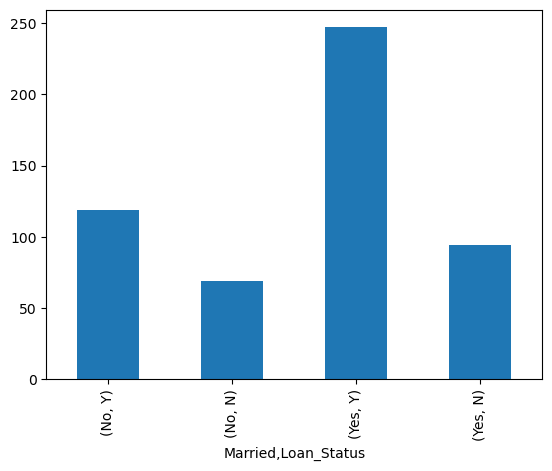

In [54]:
df.groupby("Married")["Loan_Status"].value_counts().plot(kind="bar")

# From here conclude that more married people are taking loan

# Q.3 total percentage of people are getting loan and not getting loan?

In [55]:
df["Loan_Status"].value_counts()

Loan_Status
Y    366
N    163
Name: count, dtype: int64

<Axes: ylabel='count'>

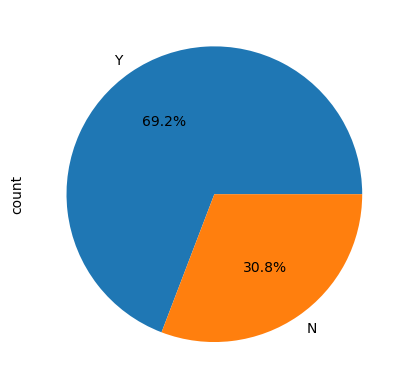

In [56]:
df["Loan_Status"].value_counts().plot(kind="pie",autopct="%0.1f%%")

# Here approx 70% of people are approved for loan

# Q.4- Does no. of dependents impact on loan status?

In [57]:
df.groupby("Loan_Status")["Dependents"].value_counts()

Loan_Status  Dependents
N            0              99
             1              28
             2              23
             3              13
Y            0             208
             2              69
             1              57
             3              32
Name: count, dtype: int64

<Axes: xlabel='Loan_Status,Dependents'>

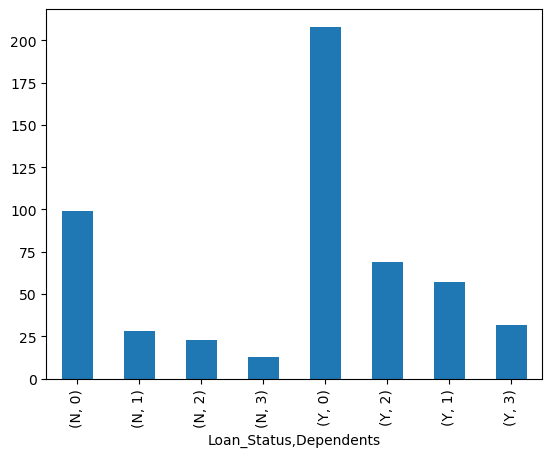

In [58]:
df.groupby("Loan_Status")["Dependents"].value_counts().plot(kind="bar")

# From above graph pattern conclude that person with less dependents are more likely to have their loans approved.

# Q.5--Is there any difference in loan status for self-employed vs. non-self-employed ?

In [59]:
pd.crosstab(df["Self_Employed"],df["Loan_Status"])

Loan_Status,N,Y
Self_Employed,,
No,139,320
Yes,24,46


array([<Axes: ylabel='N'>, <Axes: ylabel='Y'>], dtype=object)

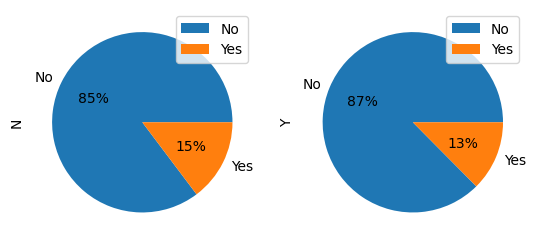

In [60]:
pd.crosstab(df["Self_Employed"],df["Loan_Status"]).plot(kind="pie",autopct="%0.0f%%",subplots=True)

# This suggests that a higher approval rate for non-self-employed people as  compared to self-employed.

# Q.6--does the property area affect loan approval rates? 

In [61]:
pd.crosstab(df["Property_Area"],df["Loan_Status"])

Loan_Status,N,Y
Property_Area,,
Rural,60,95
Semiurban,47,162
Urban,56,109


array([<Axes: ylabel='N'>, <Axes: ylabel='Y'>], dtype=object)

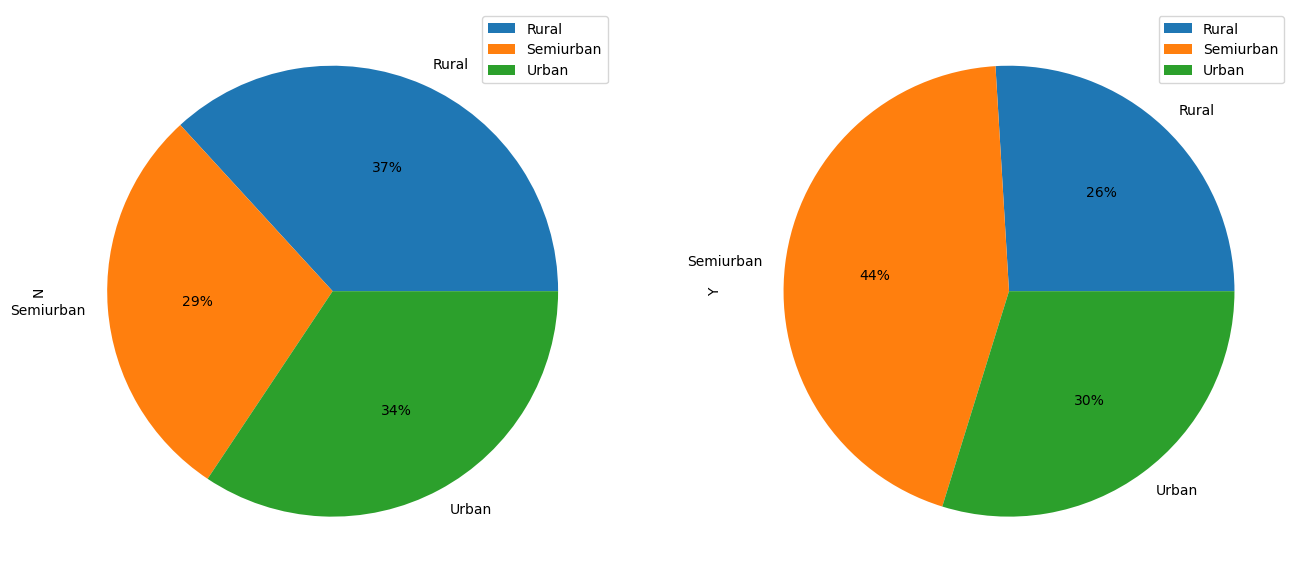

In [62]:
pd.crosstab(df["Property_Area"],df["Loan_Status"]).plot(kind="pie",subplots=True,figsize=(16,8),autopct="%0.0f%%")

# Semiurban Areas have the highest loan approval rate and the lowest rejection rate among the three property areas and Rural Areas have the lowest approval rate and the highest rejection rate

# Q.7---What are the average incomes for each gender and married status in combination?

In [63]:
df.groupby(["Gender","Married"])["Total Income"].mean()

Gender  Married
Female  No         5242.632353
        Yes        6353.222222
Male    No         6730.125000
        Yes        7623.929681
Name: Total Income, dtype: float64

Text(0, 0.5, 'COUNTS')

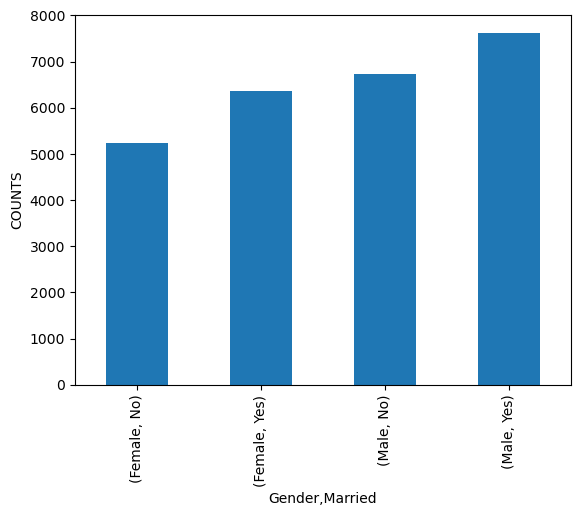

In [64]:
df.groupby(["Gender","Married"])["Total Income"].mean().plot(kind="bar")
plt.ylabel("COUNTS")

# Males have higher average incomes than females in both married status categories.

# Q.8--Does educational qualification impact  on loan approval rates?

In [65]:
pd.crosstab(df["Education"],df["Loan_Status"])

Loan_Status,N,Y
Education,,
Graduate,122,299
Not Graduate,41,67


<Axes: xlabel='Education'>

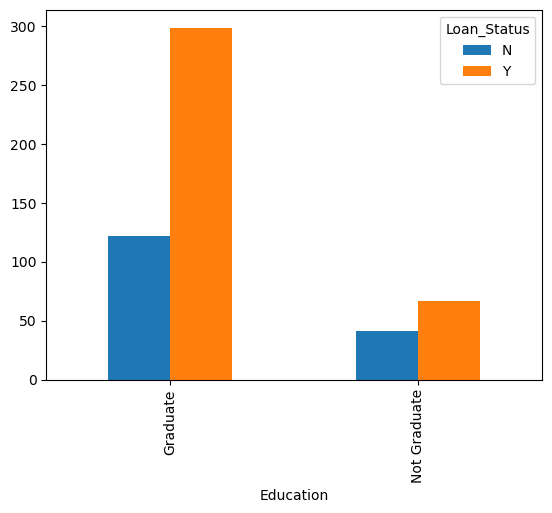

In [66]:
pd.crosstab(df["Education"],df["Loan_Status"]).plot(kind="bar")

# Graduates have higher number of loan approvals compared to non-graduates.

# Q.9---To check the average, minimum & maximum loan amount for approved vs. rejected loans?

In [67]:
df.groupby("Loan_Status")["LoanAmount"].mean()

Loan_Status
N    150.466258
Y    143.797814
Name: LoanAmount, dtype: float64

 # The larger loan amount have higher rejection rates.

In [68]:
df.groupby("Loan_Status")["LoanAmount"].min()

Loan_Status
N     9.0
Y    17.0
Name: LoanAmount, dtype: float64

# Here, min amount loans show that the higher number of rejected loans are smaller in value as compared to approved loans.

In [69]:
df.groupby("Loan_Status")["LoanAmount"].max()

Loan_Status
N    570.0
Y    700.0
Name: LoanAmount, dtype: float64

# The max loan amount of loans approved is higher ,than the max loan amount of loans rejected.

# Q.10---how loan amount vary with credit histories?

In [70]:
df.groupby('Credit_History')['LoanAmount'].describe()


,count,mean,std,min,25%,50%,75%,max
Credit_History,,,,,,,,
Bad,79.0,149.493671,87.518917,45.0,104.0,127.0,163.0,600.0
Good,450.0,145.213333,83.579624,9.0,100.0,128.0,168.0,700.0


# Q.11---what is the range of money where the more people are earning?

In [71]:
df["Total Income"].describe()

count      529.000000
mean      7050.217240
std       6589.393544
min       1442.000000
25%       4166.000000
50%       5332.000000
75%       7542.000000
max      81000.000000
Name: Total Income, dtype: float64

<Axes: ylabel='Density'>

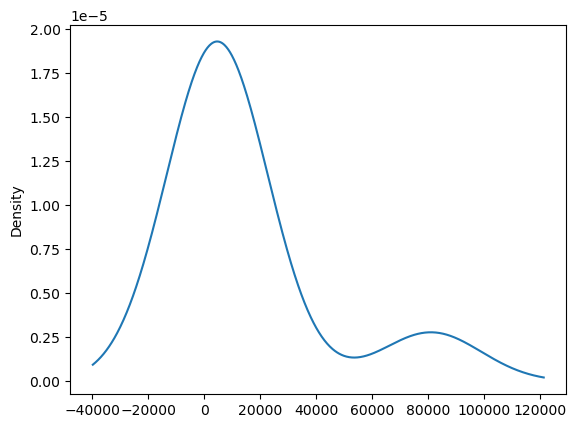

In [72]:
df["Total Income"].describe().plot(kind="kde")

# More people are earning in range of 0 to 20000

# Q.12 Top 10  Person having highest income, but not able to get loan?

In [73]:
t10=df.sort_values(by="Total Income",ascending=False).head(10)
t10[t10["Loan_Status"]=="N"]

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total Income
409,Male,Yes,3,Graduate,No,360.0,360.0,Bad,Rural,N,81000.0
581,Male,No,0,Graduate,No,90.0,360.0,Good,Urban,N,35673.0
183,Male,Yes,1,Graduate,No,260.0,360.0,Good,Semiurban,N,33846.0
369,Male,Yes,0,Graduate,No,570.0,360.0,Good,Rural,N,24996.0
9,Male,Yes,1,Graduate,No,349.0,360.0,Good,Semiurban,N,23809.0


# people having highest income also not getting loan

# Q.13--- How many percentage of people have loan status yes and no those who have income between 0 to 20000 ?

In [74]:
tp12=df[(df['Total Income'] >= 10000) & (df['Total Income'] <= 20000)]
tp12["Loan_Status"].value_counts()

Loan_Status
Y    44
N    21
Name: count, dtype: int64

<Axes: ylabel='count'>

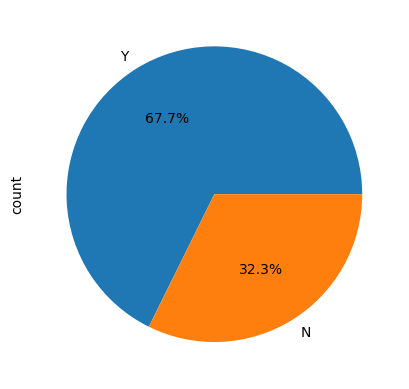

In [75]:
tp12["Loan_Status"].value_counts().plot(kind="pie",autopct="%0.1f%%")

# Having income in range of 10000 to 20000 ,67.7% of people are approved for loan

# Q.14-- Is there any affect on loan approval(loan status) based on Credit History?

In [76]:
pd.crosstab(df["Credit_History"],df["Loan_Status"])

Loan_Status,N,Y
Credit_History,,
Bad,72,7
Good,91,359


<Axes: xlabel='Credit_History'>

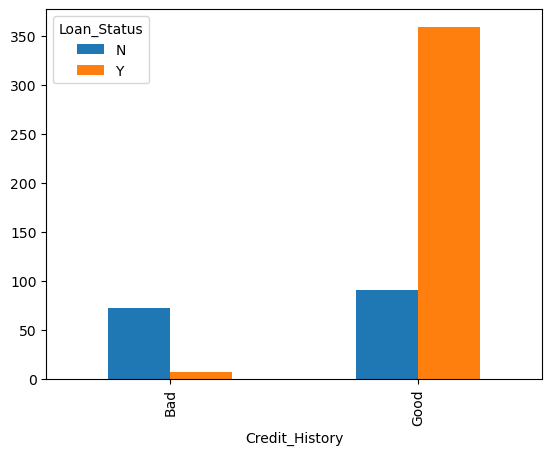

In [77]:
pd.crosstab(df["Credit_History"],df["Loan_Status"]).plot(kind="bar")

# -Bad credit history=72/79*100=91%  AND  Good credit history=91/450*100=20%
# Bad credit history have a higher approval rate...So Credit history is not important

# Q.15---the count of different loan amount terms for each loan status ("Approved" or "Rejected")?

In [78]:
df.groupby("Loan_Status")["Loan_Amount_Term"].value_counts()

Loan_Status  Loan_Amount_Term
N            360.0               133
             180.0                12
             480.0                 9
             300.0                 5
             36.0                  2
             84.0                  1
             240.0                 1
Y            360.0               319
             180.0                29
             300.0                 5
             480.0                 5
             120.0                 3
             60.0                  2
             84.0                  2
             240.0                 1
Name: count, dtype: int64

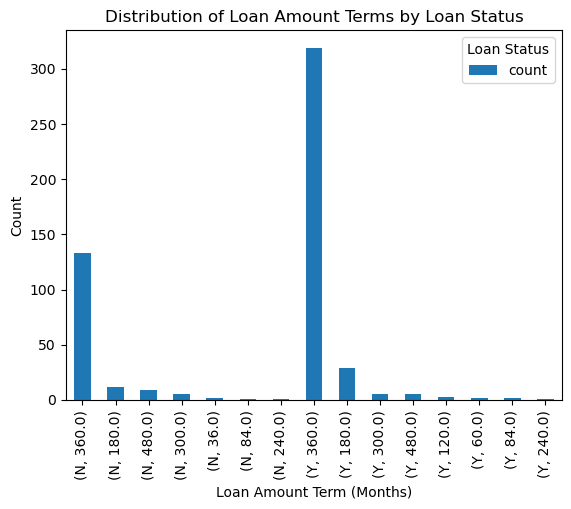

In [79]:
df.groupby("Loan_Status")["Loan_Amount_Term"].value_counts().plot(kind='bar', stacked=True)
plt.title('Distribution of Loan Amount Terms by Loan Status')
plt.xlabel('Loan Amount Term (Months)')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

# 360Months loan term is the most dominant in both approved (Y) and rejected (N) loans.

# Q.16---Analysis of whole data with Loan_Status using pair plot? 

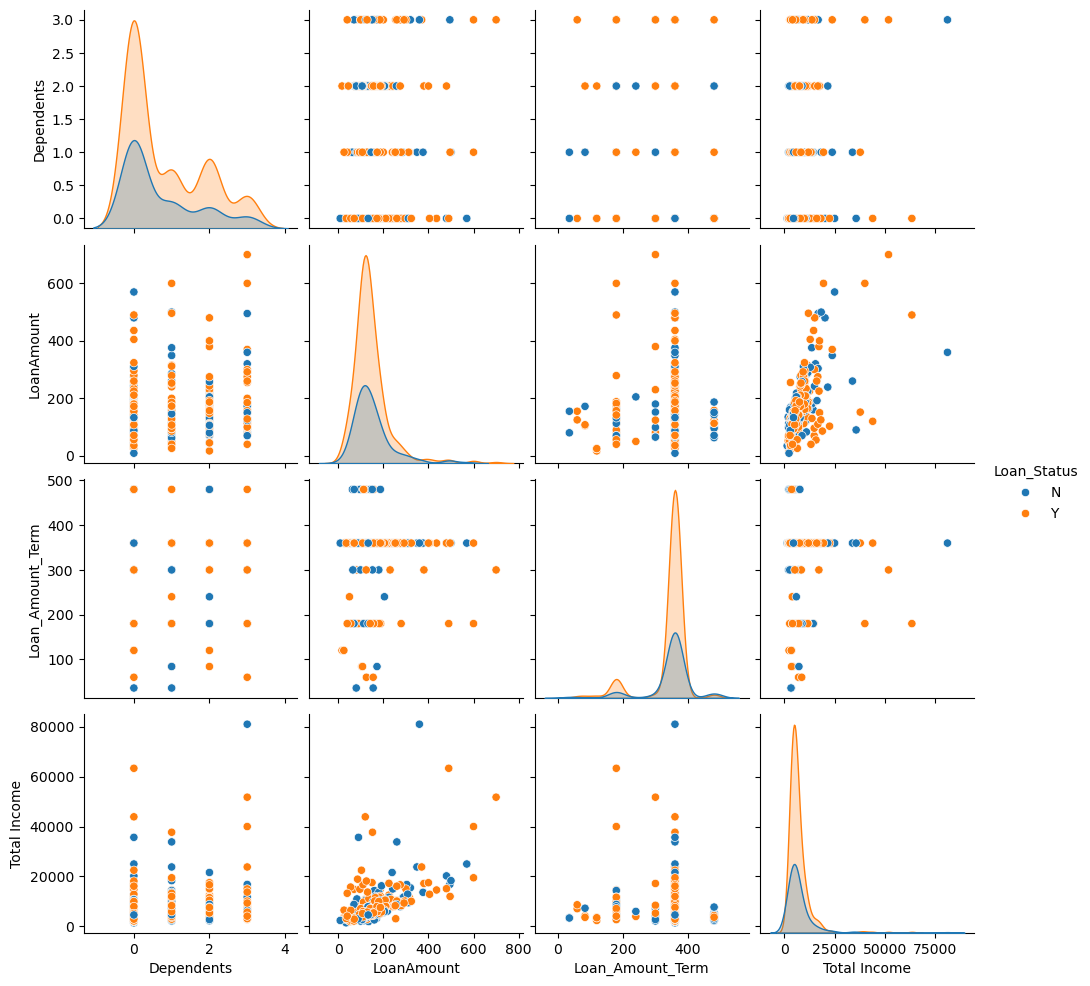

In [80]:
sns.pairplot(df,hue="Loan_Status")

--------------
# CONCLUSION:
--------------
# This project highlighted the importance of fact-based insights in shaping policies and strategies for loan management.

# ADVANCE ANALYTICS

# Encoding

In [81]:
#Encoding of Gender Column as "Female":0,"Male":1
df["Gender"] = df["Gender"].replace({"Female":0,"Male":1})


#Encoding of Self_Employed Column as "No":0,"Yes":1
df["Self_Employed"] = df["Self_Employed"].replace({"No":0,"Yes":1})


#Encoding of Credit_History Column as Bad":0,"Good":1
df["Credit_History"] = df["Credit_History"].replace({"Bad":0,"Good":1})

#Encoding of Education Column as "Graduate":0,"Not Graduate":1
df["Education"] = df["Education"].replace({"Graduate":0,"Not Graduate":1})

#Encoding of Married Column as "No":0,"Yes":1
df["Married"] = df["Married"].replace({"No":0,"Yes":1})

#Encoding of Married Column as "N":0,"Y":1
df["Loan_Status"] = df["Loan_Status"].replace({"N":0,"Y":1})

#One-Hot-Encoding of Property_Area Column
df = pd.get_dummies(df, columns=["Property_Area"], drop_first=True)





In [82]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
num_cols = ["LoanAmount", "Loan_Amount_Term", "Total Income"]
df[num_cols] = sc.fit_transform(df[num_cols])

In [83]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total Income,Property_Area_Semiurban,Property_Area_Urban
1,1,1,1,0,0,-0.212457,0.272350,1,0,-0.145708,False,False
2,1,1,0,0,1,-0.950299,0.272350,1,1,-0.615239,False,True
3,1,1,0,1,0,-0.307663,0.272350,1,1,-0.320396,False,True
4,1,0,0,0,0,-0.057749,0.272350,1,1,-0.159531,False,True
5,1,1,2,0,1,1.441736,0.272350,1,1,0.389294,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,-0.890796,0.272350,1,1,-0.630429,False,False
610,1,1,3,0,0,-1.259716,-2.505413,1,1,-0.447234,False,False
611,1,1,1,0,0,1.275127,0.272350,1,1,0.191668,False,True
612,1,1,2,0,0,0.489682,0.272350,1,1,0.080931,False,True


In [84]:
df.to_excel("Home_Loan_Cleaned_Data.xlsx",index=False)